In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import upsetplot
import session_info
import pyreadr

In [4]:
df = pd.read_csv(r'/media/adolfo/Almacenamiento/PROGRAMACIÓN/Proyectos/Data/ShopCustomer/shopcustomer/data/raw/Customers.csv')

In [5]:
df


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

Análisis de nulos: 35 nulos.

In [7]:
(
    df
    .isnull()
    .sum()
    .sum()
)

35

Proporción de nulos por variable: Los datos nulos se concentran de forma mínima en la variable profesión. 

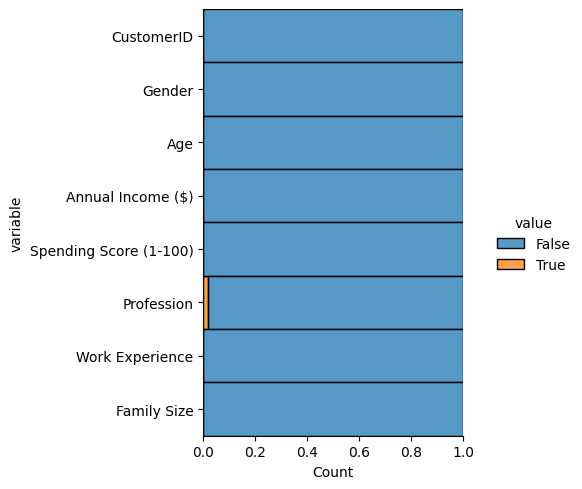

In [8]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill'
            )
        )
    )
)

Eliminación de nulos de la variable Profession

In [9]:
df_sinnulos = df.dropna(subset=['Profession'])
df_sinnulos

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


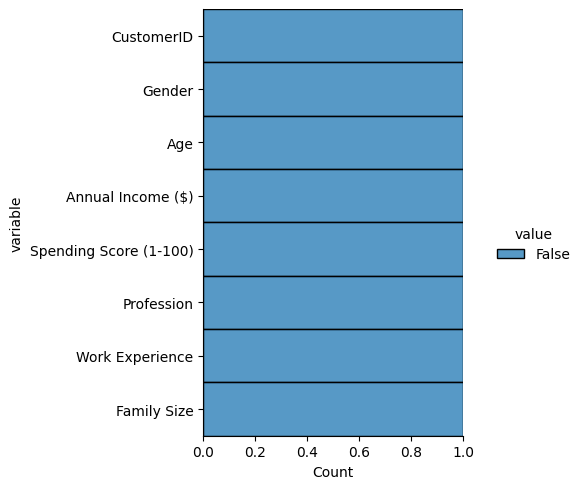

In [10]:
(
    df_sinnulos
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill'
            )
        )
    )
)

Visualización general de variables categóricas: 
-Entre los clientes encontramos más mujeres que hombres. 


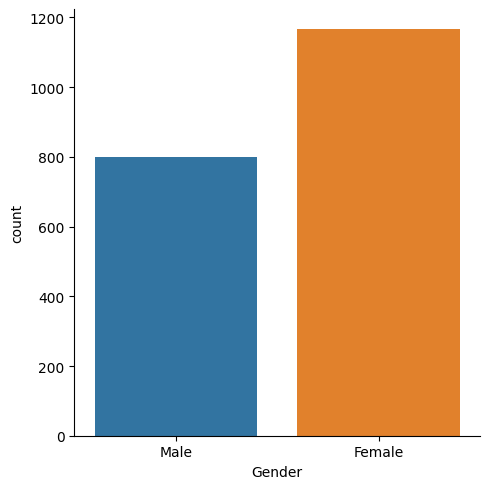

In [11]:
sns.catplot(
    data=df_sinnulos,
    x='Gender',
    kind='count'
)

Relación entre variable Gender y Age: Existe una distribución homogénea entre las edades de los clientes. 

<AxesSubplot:xlabel='Gender', ylabel='Age'>

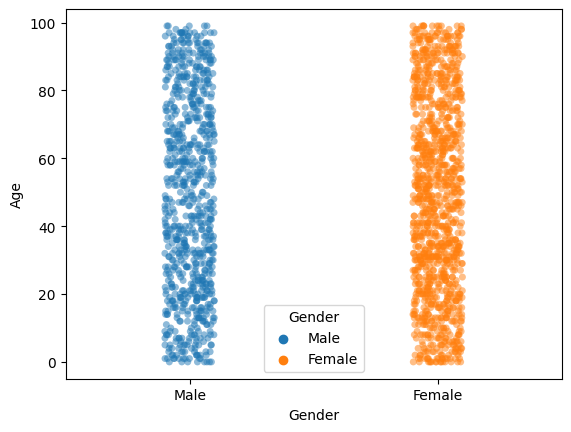

In [12]:
sns.stripplot(
    data=df_sinnulos,
    x ='Gender',
    y ='Age',
    hue='Gender',
    alpha=0.5

)

Cambio de nombre de variables para facilitar trazar correlaciones gráficas

In [13]:
df_2 = df_sinnulos.rename(columns={'Annual Income ($)': 'AnualIncome', 'Spending Score (1-100)': 'Score'})
df_2

,CustomerID,Gender,Age,AnualIncome,Score,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Relación del Score con diferentes variables.
1) Score y género: Existe distribución homogénea entre género y Score

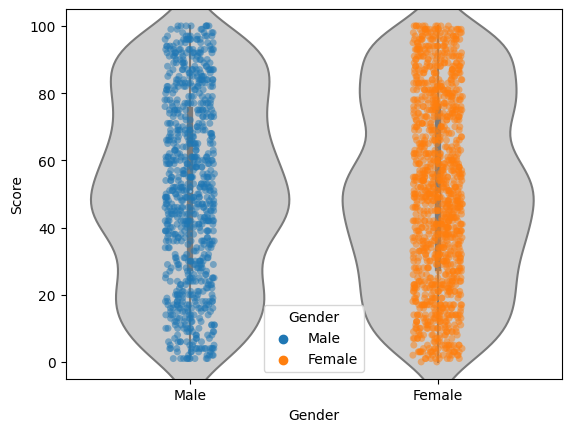

In [14]:
ax = sns.violinplot(
    data=df_2,
    x='Gender',
    y='Score',
    color='.8'
)
ax =sns.stripplot(
    data=df_2,
    x='Gender',
    y='Score',
    hue='Gender',
    alpha= 0.5
    
)

Conteo de profesiones: 

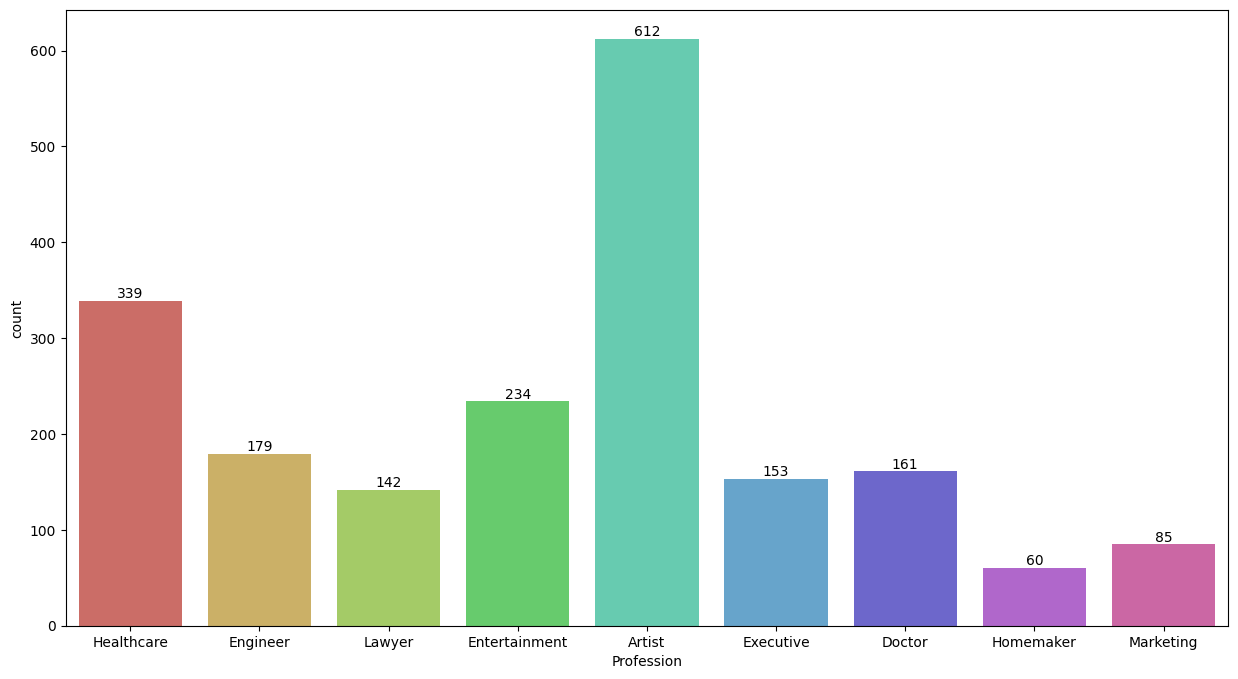

In [17]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x='Profession', data=df_2, palette="hls")
ax.bar_label(ax.containers[0]);
